In [13]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime

%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [2]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [64]:
sql = pg.SQL('''
WITH X AS (
SELECT a.segment_id, b.length AS seg_length, 
avg(a.segment_tt_avg_all) AS tt_avg_all, avg(a.segment_tt_avg_hc) AS tt_avg_hc,
b.length/avg(a.segment_tt_avg_all) * 3.6 AS spd_all, b.length/avg(a.segment_tt_avg_hc) * 3.6 AS spd_hc
FROM congestion.tt_segments_30min_test a
JOIN congestion.segments_test b USING (segment_id)
GROUP BY segment_id, b.length
ORDER BY segment_id
	)
	SELECT floor(spd_all) AS bin, COUNT(*) AS freq
	FROM X
	GROUP BY floor(spd_all)
	ORDER BY bin''')

pdf_table = pandasql.read_sql(sql, con)
print_table(sql, con)

bin,freq
23.0,1
26.0,2
27.0,1
29.0,1
32.0,1
34.0,1
35.0,1
36.0,1
37.0,1
38.0,2


Text(0.5, 1.0, 'Probability density function ')

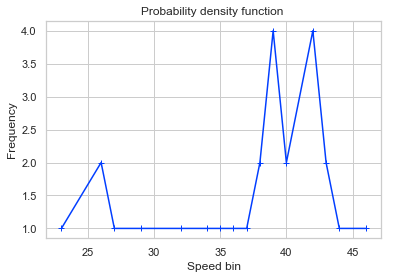

In [65]:
fig, ax = plt.subplots (1,1, figsize=(6,4))
#NUM_COLORS = 2
#cm = plt.get_cmap('cool')
#bar_width = 0.3
#colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

ax.plot(pdf_table['bin'], pdf_table['freq'], marker= '+', linestyle ='-')

#ax.legend(handles=handles)
ax.set_xlabel('Speed bin')
ax.set_ylabel('Frequency')
ax.set_title('Probability density function ')

In [9]:
sql = pg.SQL('''
SELECT a.segment_id, b.length AS seg_length, 
avg(a.segment_tt_avg_all) AS tt_avg_all, avg(a.segment_tt_avg_hc) AS tt_avg_hc,
b.length/avg(a.segment_tt_avg_all) * 3.6 AS spd_all, b.length/avg(a.segment_tt_avg_hc) * 3.6 AS spd_hc
FROM congestion.tt_segments_30min_test a
JOIN congestion.segments_test b USING (segment_id)
GROUP BY segment_id, b.length
ORDER BY segment_id
''')

pdf_table2 = pandasql.read_sql(sql, con)
print_table(sql, con)

segment_id,seg_length,tt_avg_all,tt_avg_hc,spd_all,spd_hc
1,1471.150657,118.689064,115.808460,44.621991,45.731913
2,833.374898,82.484908,74.422883,36.372104,40.312193
3,1471.150657,113.442271,109.172645,46.685793,48.511625
4,1011.300127,92.697268,96.002359,39.274949,37.922823
5,833.374898,79.525043,75.118683,37.725847,39.938794
6,832.686006,77.046642,69.678851,38.907207,43.021226
7,1518.185212,130.072671,130.057477,42.018563,42.023472
8,832.686006,76.899502,70.646323,38.981652,42.432069
9,1483.638456,125.001218,114.463394,42.728371,46.662066
10,1233.705811,124.721830,116.816073,35.609972,38.019947


(array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1., 1., 0., 1., 0., 4., 3., 1., 0., 1., 3., 1., 1., 1., 0.,
        0., 1.]),
 array([23.05005208, 23.70660043, 24.36314879, 25.01969715, 25.6762455 ,
        26.33279386, 26.98934221, 27.64589057, 28.30243893, 28.95898728,
        29.61553564, 30.27208399, 30.92863235, 31.58518071, 32.24172906,
        32.89827742, 33.55482577, 34.21137413, 34.86792249, 35.52447084,
        36.1810192 , 36.83756755, 37.49411591, 38.15066427, 38.80721262,
        39.46376098, 40.12030933, 40.77685769, 41.43340605, 42.0899544 ,
        42.74650276, 43.40305111, 44.05959947, 44.71614782, 45.37269618,
        46.02924454, 46.68579289]),
 <a list of 36 Patch objects>)

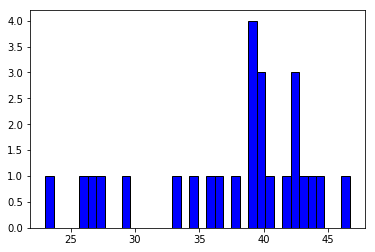

In [11]:
plt.hist(pdf_table2['spd_all'], color = 'blue', edgecolor = 'black', bins = int(180/5))

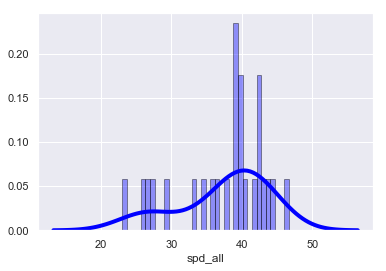

In [15]:
sns.distplot(pdf_table2['spd_all'], hist=True, kde=True, 
             bins=int(180/5), color ='blue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth':4})

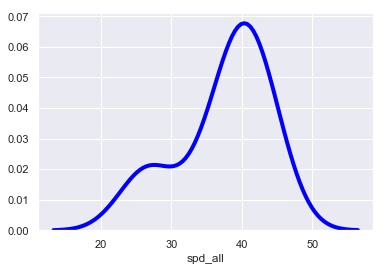

In [16]:
sns.distplot(pdf_table2['spd_all'], hist=False, kde=True, 
             bins=int(180/5), color ='blue', 
             kde_kws={'linewidth':4})

Text(0.5, 1.0, 'Probability Density Function of Speeds')

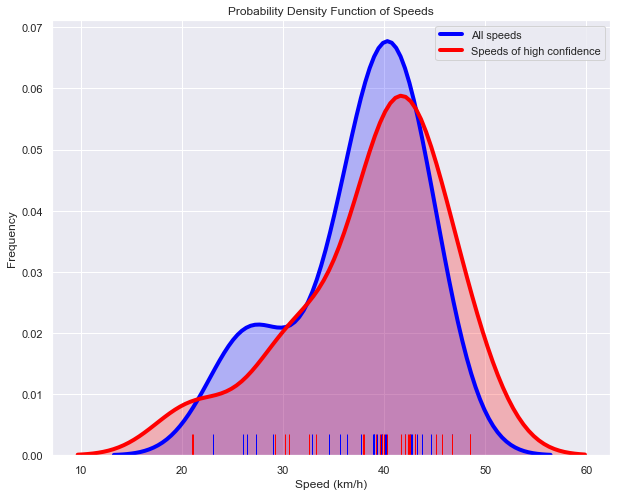

In [29]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.distplot(pdf_table2['spd_all'], hist=False, kde=True, rug=True,
             bins=int(180/5), color ='blue', ax=ax,
             kde_kws={'linewidth':4,'shade':True}, label='All speeds')
sns.distplot(pdf_table2['spd_hc'], hist=False, kde=True, rug=True, 
             bins=int(180/5), color ='red', ax=ax,
             kde_kws={'linewidth':4,'shade':True}, label='Speeds of high confidence')
ax.legend()
ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Frequency')
ax.set_title('Probability Density Function of Speeds')

Text(0.5, 1.0, 'Probability Density Function of Speeds')

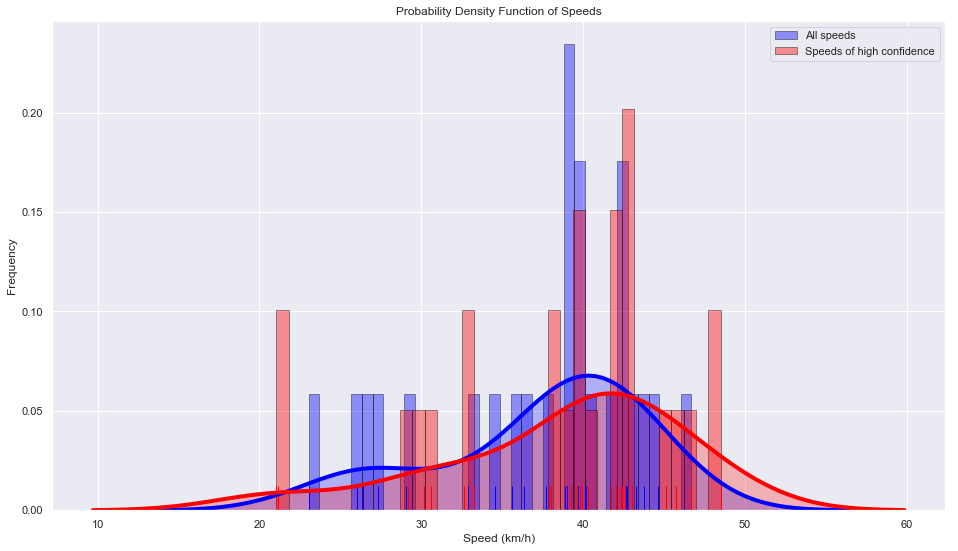

In [30]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.distplot(pdf_table2['spd_all'], hist=True, kde=True, rug=True,
             bins=int(180/5), color ='blue', ax=ax,
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth':4,'shade':True}, 
             label='All speeds')
sns.distplot(pdf_table2['spd_hc'], hist=True, kde=True, rug=True, 
             bins=int(180/5), color ='red', ax=ax,
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth':4,'shade':True}, 
             label='Speeds of high confidence')
ax.legend()
ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Frequency')
ax.set_title('Probability Density Function of Speeds')

Text(0.5, 1.0, 'Probability Density Function of Speeds')

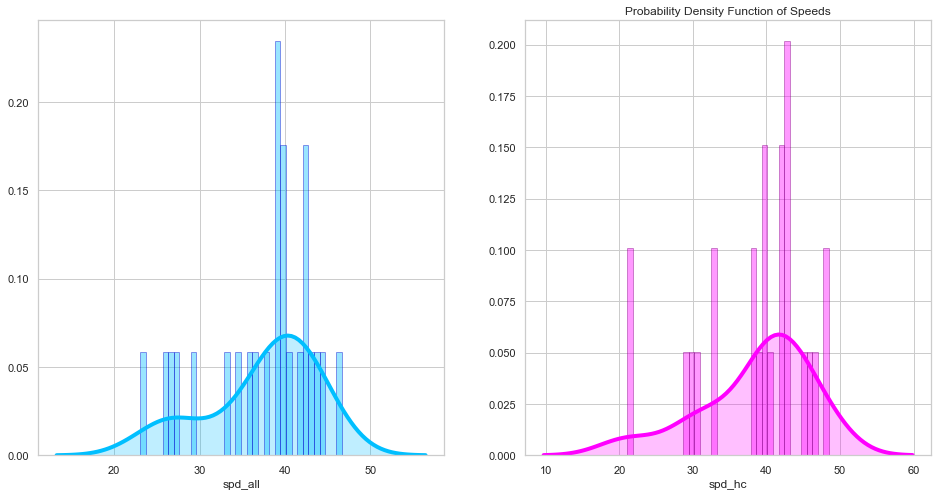

In [66]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.set_style='darkgrid'
sns.distplot(pdf_table2['spd_all'], hist=True, kde=True, rug=False,
             bins=int(180/5), color ='deepskyblue', ax=ax[0],
             hist_kws={'edgecolor':'mediumblue'}, 
             kde_kws={'linewidth':4,'shade':True}, 
             label='All speeds')
sns.distplot(pdf_table2['spd_hc'], hist=True, kde=True, rug=False, 
             bins=int(180/5), color ='magenta', ax=ax[1],
             hist_kws={'edgecolor':'purple'}, 
             kde_kws={'linewidth':4,'shade':True}, 
             label='Speeds of high confidence')
#ax.legend()
#ax.set_xlabel('Speed (km/h)')
#ax.set_ylabel('Frequency')
plt.title('Probability Density Function of Speeds', loc='center')

Text(0.0, 1.0, 'Probability Density Function of Speeds')

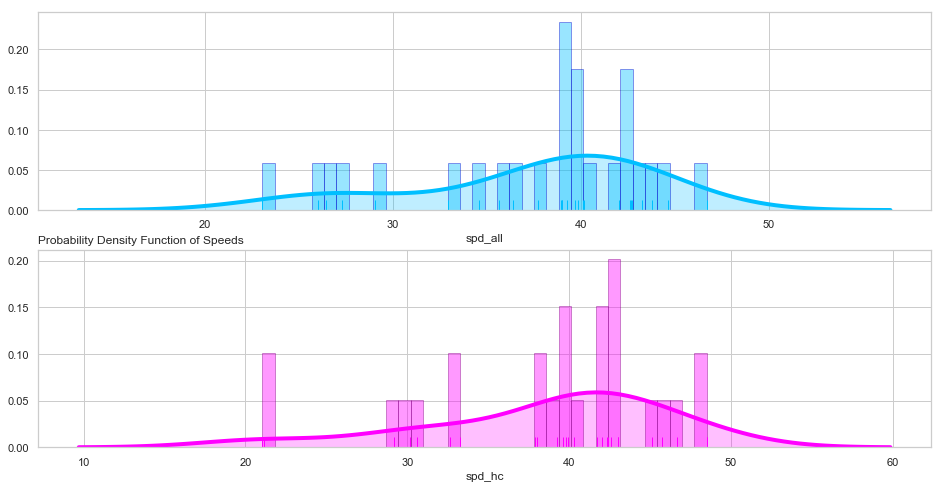

In [61]:
fig, ax = plt.subplots(2,1,figsize=(16,8))
sns.set_style='whitegrid'
sns.set(style='whitegrid',palette='bright')
sns.distplot(pdf_table2['spd_all'], hist=True, kde=True, rug=True,
             bins=int(180/5), color ='deepskyblue', ax=ax[0],
             hist_kws={'edgecolor':'mediumblue'}, 
             kde_kws={'linewidth':4,'shade':True}, 
             label='All speeds')
sns.distplot(pdf_table2['spd_hc'], hist=True, kde=True, rug=True, 
             bins=int(180/5), color ='magenta', ax=ax[1],
             hist_kws={'edgecolor':'purple'}, 
             kde_kws={'linewidth':4,'shade':True}, 
             label='Speeds of high confidence')

plt.title('Probability Density Function of Speeds', loc='left')